In [9]:
#1 Load the dataset and display its shape, column names, and first 5 rows.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Win10\Downloads\gold_price_data_Linear.csv")

df.head()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [10]:

df.shape

(5215, 7)

In [12]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [11]:
df.head(5)

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [13]:
#2 Check for missing values and duplicates. Clean the dataset if necessary.
df.isnull()

,date,open,high,low,close,adj_close,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5210,False,False,False,False,False,False,False
5211,False,False,False,False,False,False,False
5212,False,False,False,False,False,False,False
5213,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5210    False
5211    False
5212    False
5213    False
5214    False
Length: 5215, dtype: bool

In [16]:
df.duplicated().sum()

0

In [17]:
#3 Perform exploratory data analysis (EDA): show descriptive statistics and visualize distributions of key features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5215 non-null   object 
 1   open       5215 non-null   float64
 2   high       5215 non-null   float64
 3   low        5215 non-null   float64
 4   close      5215 non-null   float64
 5   adj_close  5215 non-null   float64
 6   volume     5215 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.3+ KB


In [18]:

df.describe()

,open,high,low,close,adj_close,volume
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5.215000e+03
mean,131.940968,131.940968,132.570993,131.256556,131.939183,9.423568e+06
std,51.291094,51.291094,51.459284,51.073175,51.282084,6.645282e+06
min,41.259998,41.259998,41.360001,41.020000,41.029999,3.193000e+05
25%,104.730000,104.730000,105.355000,104.160000,104.754997,5.305150e+06
50%,124.400002,124.400002,124.870003,123.980003,124.459999,7.818800e+06
75%,164.779999,164.779999,165.489998,164.004997,164.544998,1.154915e+07
max,316.290009,316.290009,317.630005,315.040009,317.489990,9.380420e+07


In [19]:
df['close'].value_counts()

close
122.029999    6
121.730003    6
120.769997    6
121.550003    5
116.580002    5
             ..
155.679993    1
156.720001    1
156.600006    1
156.690002    1
306.709991    1
Name: count, Length: 4220, dtype: int64

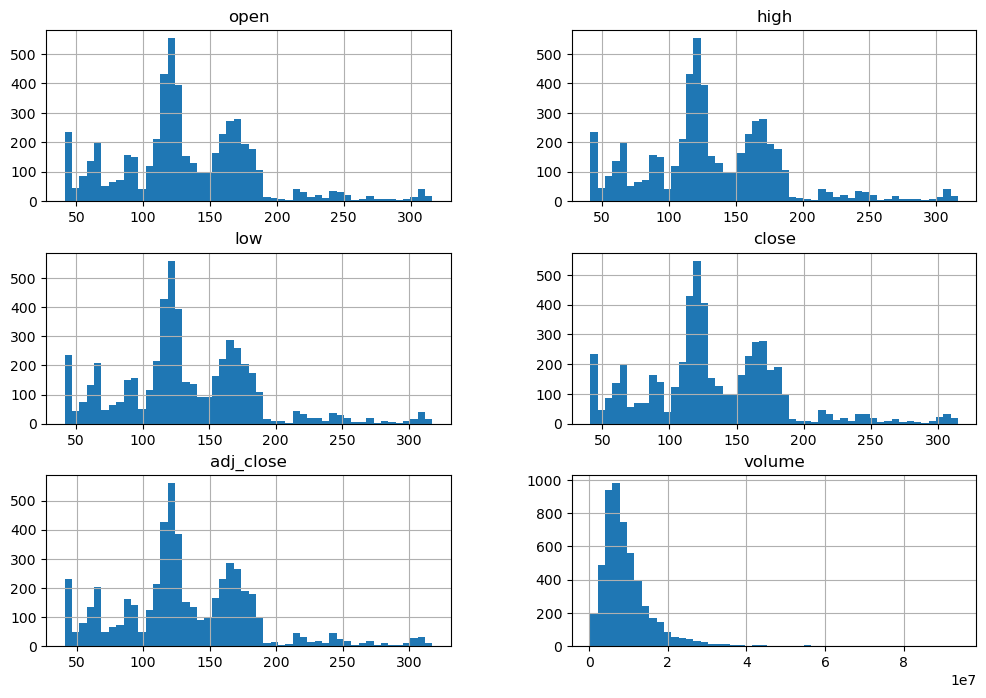

In [20]:
df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].hist(bins=50, figsize=(12,8))
plt.show()

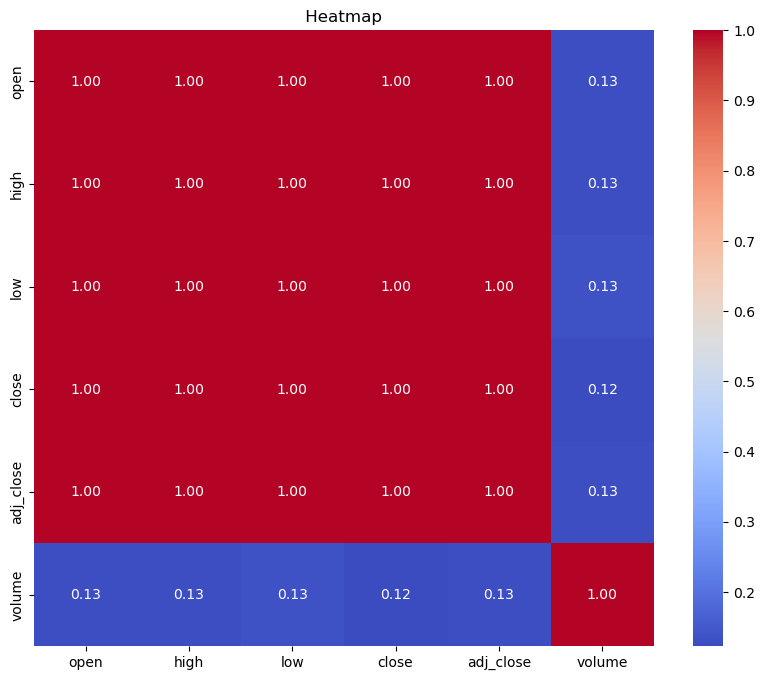

In [21]:

#4 Create a correlation heatmap to identify which features are highly correlated with the target variable (Gold Price).
import seaborn as sns
corr_matrix = df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr()
numeric_df = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Heatmap ")
plt.show()

In [22]:
#5 Select independent variables (e.g., Open, High, Low, Volume) and target variable (Close/Price).
X=df.iloc[:,[0,1,2,3,5,6]]
print(X)

            date        open        high         low   adj_close    volume
0     2004-11-18   44.380001   44.380001   44.490002   44.430000   5992000
1     2004-11-19   44.779999   44.779999   44.919998   44.490002  11655300
2     2004-11-22   44.950001   44.950001   44.970001   44.750000  11996000
3     2004-11-23   44.750000   44.750000   44.919998   44.880001   3169200
4     2004-11-24   45.049999   45.049999   45.049999   44.930000   6105100
...          ...         ...         ...         ...         ...       ...
5210  2025-08-06  310.500000  310.500000  311.239990  310.320007   7418200
5211  2025-08-07  313.119995  313.119995  313.140015  311.720001  10891500
5212  2025-08-08  313.049988  313.049988  313.529999  312.350006  19886800
5213  2025-08-11  308.549988  308.549988  309.660004  308.619995  10326700
5214  2025-08-12  308.269989  308.269989  309.309998  308.220001   9697400

[5215 rows x 6 columns]


In [23]:
y=df.iloc[:,[4]]
print(y)

           close
0      44.070000
1      44.470001
2      44.740002
3      44.720001
4      44.790001
...          ...
5210  309.839996
5211  310.700012
5212  311.000000
5213  307.630005
5214  306.709991

[5215 rows x 1 columns]


In [24]:
#6 Split the dataset into training (80%) and testing (20%) sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [25]:
X_train

,date,open,high,low,adj_close,volume
2173,2013-07-10,120.949997,120.949997,122.349998,121.150002,14697100
927,2008-07-28,91.730003,91.730003,92.000000,91.389999,8809600
2499,2014-10-23,118.519997,118.519997,118.820000,118.709999,6417500
45,2005-01-25,42.240002,42.240002,42.560001,42.529999,1332500
1741,2011-10-18,161.839996,161.839996,162.029999,159.960007,15390800
...,...,...,...,...,...,...
466,2006-09-26,58.740002,58.740002,58.970001,58.500000,2763400
3092,2017-03-03,117.510002,117.510002,117.730003,116.949997,10665800
3772,2019-11-13,137.979996,137.979996,138.220001,137.800003,8776000
5191,2025-07-10,306.200012,306.200012,306.510010,306.109985,7053700


In [26]:
y_test

,close
1897,154.869995
877,86.230003
4431,169.509995
4724,177.509995
1595,138.669998
...,...
1867,159.020004
2727,108.330002
841,93.059998
1893,151.630005


In [27]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [29]:
 #7 Train a Linear Regression model on the training set.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

if 'date' in df.columns:
    df = df.drop(columns=['date'])



X = df.drop(columns=['close'])   
y = df['close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [30]:
#8 Evaluate the model using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score on the test set.

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

print("Intercept(m):", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error (MSE): 0.1350977651813768
Root Mean Squared Error (RMSE): 0.3675564789000145
R² Score: 0.9999493679331694
Intercept(m): 0.1486442790289857
Coefficients: [ 3.61825663e-01  3.61825664e-01 -3.52034977e-01  6.25809341e-01
 -2.88318859e-08]


In [35]:
# r2 should be more

mse & rmse low 

SyntaxError: invalid syntax (3395587996.py, line 3)